In [162]:
import os

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:

paths = '/content/drive/My Drive/datasets_files/MASK'


In [165]:
from keras.preprocessing import image

In [166]:
import cv2

In [167]:
categories = ['with_mask','without_mask']

In [168]:
data = []
for category in categories:
  path = os.path.join(paths,category)
  label = categories.index(category)
  for file in os.listdir(path):
    img_path = os.path.join(path,file)
    img = cv2.imread(img_path)
    img = cv2.resize(img,(224,224))
    data.append([img,label])


In [169]:
len(data)

1289

In [170]:
import random

In [171]:
random.shuffle(data)

In [172]:
x =[]
y = []

for features,label in data:
    x.append(features)
    y.append(label)

In [173]:
len(x)

1289

In [174]:
len(y)

1289

In [175]:
import numpy as np

In [176]:
x = np.array(x)

In [177]:
x.shape

(1289, 224, 224, 3)

In [178]:
x[0:2]

array([[[[ 60,  60,  60],
         [ 59,  59,  59],
         [ 58,  58,  58],
         ...,
         [ 56,  64,  71],
         [ 87,  95, 102],
         [111, 121, 128]],

        [[ 56,  56,  56],
         [ 55,  55,  55],
         [ 54,  54,  54],
         ...,
         [ 44,  52,  59],
         [ 62,  71,  78],
         [ 75,  85,  92]],

        [[ 51,  51,  51],
         [ 51,  51,  51],
         [ 49,  49,  49],
         ...,
         [ 45,  53,  60],
         [ 51,  59,  66],
         [ 53,  63,  70]],

        ...,

        [[249, 254, 254],
         [156, 161, 160],
         [132, 137, 136],
         ...,
         [207, 202, 205],
         [248, 245, 246],
         [254, 253, 255]],

        [[239, 244, 243],
         [207, 212, 211],
         [221, 226, 226],
         ...,
         [224, 217, 218],
         [254, 249, 249],
         [255, 253, 254]],

        [[249, 254, 253],
         [247, 252, 251],
         [238, 243, 242],
         ...,
         [252, 246, 246],
        

In [179]:
y = np.array(y)

In [180]:
y.shape

(1289,)

In [181]:
y[0:2]

array([0, 0])

In [182]:
x = x/255

In [183]:
x[0]

array([[[0.23529412, 0.23529412, 0.23529412],
        [0.23137255, 0.23137255, 0.23137255],
        [0.22745098, 0.22745098, 0.22745098],
        ...,
        [0.21960784, 0.25098039, 0.27843137],
        [0.34117647, 0.37254902, 0.4       ],
        [0.43529412, 0.4745098 , 0.50196078]],

       [[0.21960784, 0.21960784, 0.21960784],
        [0.21568627, 0.21568627, 0.21568627],
        [0.21176471, 0.21176471, 0.21176471],
        ...,
        [0.17254902, 0.20392157, 0.23137255],
        [0.24313725, 0.27843137, 0.30588235],
        [0.29411765, 0.33333333, 0.36078431]],

       [[0.2       , 0.2       , 0.2       ],
        [0.2       , 0.2       , 0.2       ],
        [0.19215686, 0.19215686, 0.19215686],
        ...,
        [0.17647059, 0.20784314, 0.23529412],
        [0.2       , 0.23137255, 0.25882353],
        [0.20784314, 0.24705882, 0.2745098 ]],

       ...,

       [[0.97647059, 0.99607843, 0.99607843],
        [0.61176471, 0.63137255, 0.62745098],
        [0.51764706, 0

In [184]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [185]:
x_train.shape

(1031, 224, 224, 3)

In [186]:
x_test.shape

(258, 224, 224, 3)

In [187]:
from keras.applications.vgg16 import VGG16

In [201]:
vgg = VGG16()

In [189]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [190]:
from keras import Sequential

In [191]:
model = Sequential()

In [192]:
for layer in vgg.layers[0:-1]:
  model.add(layer)

In [193]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [194]:
for layer in model.layers:
  layer.trainable=False

In [195]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [196]:
from keras.layers import Dense

In [197]:
model.add(Dense(1,activation='sigmoid'))

In [198]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [199]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [202]:
model.fit(x_train,y_train,epochs=6, validation_data=(x_test,y_test))

Epoch 1/6
33/33 [==============================] - 6s 192ms/step - loss: 0.1689 - accuracy: 0.9525 - val_loss: 0.1694 - val_accuracy: 0.9535
Epoch 2/6
33/33 [==============================] - 6s 180ms/step - loss: 0.1551 - accuracy: 0.9583 - val_loss: 0.1564 - val_accuracy: 0.9574
Epoch 3/6
33/33 [==============================] - 6s 177ms/step - loss: 0.1448 - accuracy: 0.9583 - val_loss: 0.1654 - val_accuracy: 0.9574
Epoch 4/6
33/33 [==============================] - 6s 179ms/step - loss: 0.1450 - accuracy: 0.9602 - val_loss: 0.1421 - val_accuracy: 0.9651
Epoch 5/6
33/33 [==============================] - 6s 184ms/step - loss: 0.1269 - accuracy: 0.9661 - val_loss: 0.1363 - val_accuracy: 0.9496
Epoch 6/6
33/33 [==============================] - 6s 186ms/step - loss: 0.1173 - accuracy: 0.9680 - val_loss: 0.1224 - val_accuracy: 0.9651


In [203]:
model.predict(x[0:10])

1/1 [==============================] - 0s 159ms/step


array([[0.27402958],
       [0.00554176],
       [0.10093716],
       [0.00582457],
       [0.07685706],
       [0.94640344],
       [0.5673654 ],
       [0.9733016 ],
       [0.9785991 ],
       [0.06226794]], dtype=float32)

In [204]:
y[0:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [205]:
single_image = x[0]

single_image_batch = np.expand_dims(single_image, axis=0)

y_pred = model.predict(single_image_batch)
print(y_pred)


1/1 [==============================] - 0s 27ms/step
[[0.2740297]]


In [218]:
import numpy as np

def predict_mask(single_image_batch, model):
    single_image_batch = cv2.resize(single_image_batch,(224,224))
    single_image_batch = np.array(single_image_batch)
    single_image_batch = single_image_batch/255

    single_image_batch = np.expand_dims(single_image_batch, axis=0)

    y_pred = model.predict(single_image_batch)

    predictions = (y_pred >= 0.5).astype(int)
    # print(predictions)

    result = ['nomask' if pred == 1 else 'mask' for pred in predictions]

    return result


In [207]:
tester1 = cv2.imread('/content/augmented_image_93_jpg.rf.53e7d23094c97315b6d5f6ccc53b40bc.jpg')

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
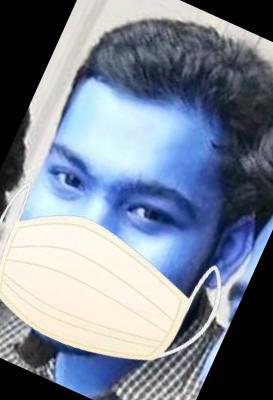

In [208]:
tester1

In [209]:
predict_mask(tester1,model)

1/1 [==============================] - 0s 25ms/step


['mask']

In [210]:
tester2 = cv2.imread('/content/augmented_image_98_jpg.rf.f0069022274d5a4f8f6539a0ff9dc558.jpg')

array([[[218, 214, 213],
        [239, 235, 234],
        [213, 211, 211],
        ...,
        [215, 214, 218],
        [204, 198, 203],
        [190, 184, 189]],

       [[223, 218, 219],
        [242, 237, 238],
        [241, 238, 240],
        ...,
        [224, 229, 228],
        [212, 215, 213],
        [199, 202, 200]],

       [[243, 237, 242],
        [216, 210, 215],
        [239, 235, 241],
        ...,
        [233, 250, 237],
        [220, 239, 222],
        [210, 229, 212]],

       ...,

       [[ 43,  30,  32],
        [  9,   0,   0],
        [ 38,  31,  36],
        ...,
        [229, 222, 229],
        [235, 226, 236],
        [239, 230, 240]],

       [[ 47,  33,  21],
        [ 38,  29,  20],
        [ 34,  32,  31],
        ...,
        [207, 202, 204],
        [254, 244, 250],
        [247, 237, 243]],

       [[ 40,  26,   7],
        [ 31,  22,   8],
        [ 25,  27,  21],
        ...,
        [140, 135, 136],
        [215, 204, 207],
        [241, 230, 233]]], dtype=uint8)
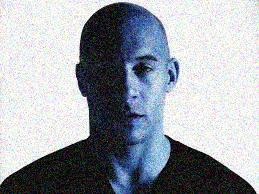

In [211]:
tester2

In [212]:
predict_mask(tester2,model)

1/1 [==============================] - 0s 40ms/step


['nomask']

In [213]:
tester3 = cv2.imread('/content/maskk.jpg')

array([[[224, 219, 220],
        [224, 219, 220],
        [224, 219, 220],
        ...,
        [224, 219, 220],
        [224, 219, 220],
        [224, 219, 220]],

       [[224, 219, 220],
        [224, 219, 220],
        [224, 219, 220],
        ...,
        [224, 219, 220],
        [224, 219, 220],
        [224, 219, 220]],

       [[224, 219, 220],
        [224, 219, 220],
        [224, 219, 220],
        ...,
        [224, 219, 220],
        [224, 219, 220],
        [224, 219, 220]],

       ...,

       [[224, 219, 220],
        [224, 219, 220],
        [224, 219, 220],
        ...,
        [ 38,  32,  33],
        [ 38,  32,  33],
        [ 38,  32,  33]],

       [[224, 219, 220],
        [224, 219, 220],
        [224, 219, 220],
        ...,
        [ 38,  32,  33],
        [ 38,  32,  33],
        [ 38,  32,  33]],

       [[224, 219, 220],
        [224, 219, 220],
        [224, 219, 220],
        ...,
        [ 39,  33,  34],
        [ 39,  33,  34],
        [ 38,  32,  33]]], dtype=uint8)
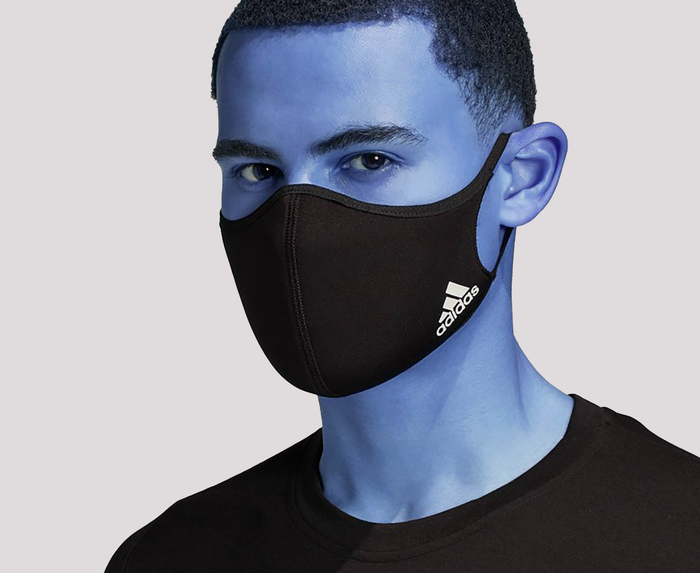

In [214]:
tester3

In [219]:
predict_mask(tester3,model)

1/1 [==============================] - 0s 18ms/step


['mask']

In [220]:
model.save('vgg16_mask_detector.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
